In [2]:
# Imports necessários
import sys

sys.path.insert(0, "../src")

import json
import pickle

import matplotlib.pyplot as plt
import pandas as pd

# Import das funções do pipeline
from crypto_ts_forecast.pipelines.inference.nodes import (
    create_forecast_summary,
    create_future_dataframe,
    extract_future_predictions,
    generate_forecast,
)

## 1. Carregar Modelo e Dados

In [3]:
# Carregar modelo treinado
with open("../data/06_models/prophet_model.pkl", "rb") as f:
    model = pickle.load(f)

# Carregar dados históricos
prophet_data = pd.read_parquet("../data/04_feature/prophet_full.parquet")

print("Modelo carregado!")
print(f"Dados históricos: {len(prophet_data)} registros")
print(f"Último dado: {prophet_data['ds'].max()}")

Modelo carregado!
Dados históricos: 1825 registros
Último dado: 2026-01-02 00:00:00


## 2. Criar DataFrame Futuro

In [4]:
# Parâmetros de previsão
FORECAST_DAYS = 30
ADD_VOLUME = False

# Criar dataframe para previsões futuras
future_df = create_future_dataframe(
    model=model,
    prophet_data=prophet_data,
    forecast_days=FORECAST_DAYS,
    add_volume_regressor=ADD_VOLUME,
)

print(f"DataFrame futuro criado: {len(future_df)} registros")
print(f"Período: {future_df['ds'].min()} até {future_df['ds'].max()}")
future_df.tail()

DataFrame futuro criado: 1855 registros
Período: 2021-01-04 00:00:00 até 2026-02-01 00:00:00


,ds
1850,2026-01-28
1851,2026-01-29
1852,2026-01-30
1853,2026-01-31
1854,2026-02-01


## 3. Gerar Forecast

In [5]:
# Gerar previsões
full_forecast = generate_forecast(model=model, future_df=future_df)

print(f"Forecast gerado: {len(full_forecast)} registros")
full_forecast.tail(10)

Forecast gerado: 1855 registros


,ds,predicted_price,predicted_price_lower,predicted_price_upper,trend,trend_lower,trend_upper
1845,2026-01-23,71058.908090,65709.348737,76238.533029,48340.179520,48087.118463,48537.509141
1846,2026-01-24,70592.355682,65449.280297,76123.291496,48387.924273,48109.986972,48646.260924
1847,2026-01-25,70198.492704,65076.644669,75838.435429,48435.669026,48090.759726,48777.028373
1848,2026-01-26,69880.349915,64343.077508,75513.642906,48483.413779,48030.693784,48903.755448
1849,2026-01-27,69368.475823,64113.811460,75045.394484,48531.158531,48004.947973,49023.243785
1850,2026-01-28,69081.352093,63236.402029,74323.561687,48578.903284,47951.626753,49171.600948
1851,2026-01-29,68599.206458,62995.628211,73887.368481,48626.648037,47926.396437,49292.892161
1852,2026-01-30,68206.422762,62336.057812,73949.945370,48674.392790,47895.698803,49386.992371
1853,2026-01-31,67789.770518,62058.678685,73092.158708,48722.137543,47839.636489,49577.126471
1854,2026-02-01,67451.365116,61880.595225,73022.091381,48769.882296,47792.781101,49726.030736


## 4. Extrair Apenas Previsões Futuras

In [6]:
# Extrair apenas as previsões futuras (após os dados históricos)
future_predictions = extract_future_predictions(
    forecast=full_forecast, prophet_data=prophet_data
)

print(f"Previsões futuras: {len(future_predictions)} dias")
future_predictions

Previsões futuras: 30 dias


,ds,predicted_price,predicted_price_lower,predicted_price_upper,trend,trend_lower,trend_upper
0,2026-01-03,79822.600147,74628.967355,84680.030419,47385.284463,47385.284463,47385.284463
1,2026-01-04,79396.414751,74684.737753,84402.879840,47433.029216,47433.029216,47433.029216
2,2026-01-05,79042.089898,74207.559352,84212.103366,47480.773969,47480.773969,47480.773969
3,2026-01-06,78494.533744,73616.111754,83307.960805,47528.518721,47528.518721,47528.518721
4,2026-01-07,78162.355588,73076.441828,83240.517374,47576.263474,47576.263474,47576.263474
5,2026-01-08,77633.257171,72338.413037,83062.157834,47624.008227,47624.008227,47624.008227
6,2026-01-09,77184.625589,72822.395242,82331.777530,47671.752980,47671.752980,47671.752980
7,2026-01-10,76704.545631,71787.257235,81786.586882,47719.497733,47719.497733,47719.497733
8,2026-01-11,76292.154331,71076.969657,81059.403350,47767.242486,47767.242486,47767.242486
9,2026-01-12,75949.274412,70574.004000,80838.816219,47814.987239,47814.987239,47814.987239


## 5. Criar Resumo do Forecast

In [7]:
# Criar resumo
summary = create_forecast_summary(
    future_predictions=future_predictions, prophet_data=prophet_data
)

print("Resumo da Previsão:")
print(json.dumps(summary, indent=2, default=str))

Resumo da Previsão:
{
  "last_historical_price": 88853.56,
  "last_historical_date": "2026-01-02",
  "forecast_start_date": "2026-01-03",
  "forecast_end_date": "2026-02-01",
  "forecast_days": 30,
  "predictions": {
    "first_day": 79822.60014722974,
    "last_day": 67451.36511578312,
    "max_predicted": 79822.60014722974,
    "min_predicted": 67451.36511578312
  },
  "expected_changes": {
    "7_day_change_pct": -13.13277083259631,
    "30_day_change_pct": -24.087042639841194,
    "end_of_forecast_change_pct": -24.087042639841194
  },
  "uncertainty": {
    "avg_interval_width": 10485.696674390783
  }
}


## 6. Visualização das Previsões

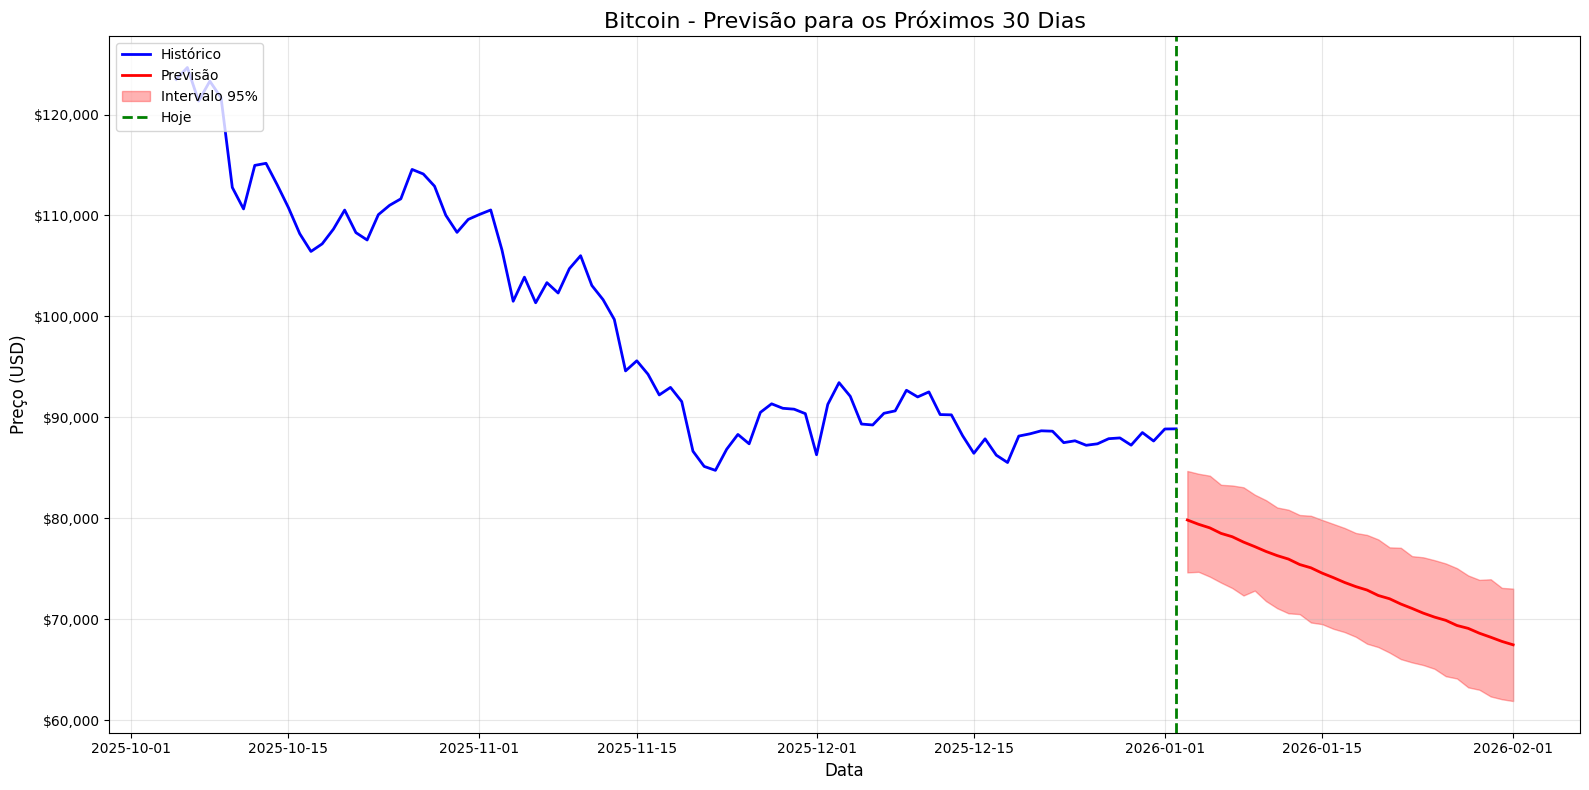

In [8]:
fig, ax = plt.subplots(figsize=(16, 8))

# Dados históricos (últimos 90 dias)
recent_data = prophet_data.tail(90)
ax.plot(recent_data["ds"], recent_data["y"], "b-", label="Histórico", linewidth=2)

# Previsões futuras
ax.plot(
    future_predictions["ds"],
    future_predictions["predicted_price"],
    "r-",
    label="Previsão",
    linewidth=2,
)

# Intervalo de confiança
ax.fill_between(
    future_predictions["ds"],
    future_predictions["predicted_price_lower"],
    future_predictions["predicted_price_upper"],
    alpha=0.3,
    color="red",
    label="Intervalo 95%",
)

# Linha de divisão
last_date = prophet_data["ds"].max()
ax.axvline(x=last_date, color="green", linestyle="--", label="Hoje", linewidth=2)

ax.set_title(f"Bitcoin - Previsão para os Próximos {FORECAST_DAYS} Dias", fontsize=16)
ax.set_xlabel("Data", fontsize=12)
ax.set_ylabel("Preço (USD)", fontsize=12)
ax.legend(loc="upper left", fontsize=10)
ax.grid(True, alpha=0.3)

# Formatar eixo Y
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"${x:,.0f}"))

plt.tight_layout()
plt.show()

In [9]:
# Tabela de previsões diárias
print("\nPrevisões Diárias:")
print("=" * 80)
print(f"{'Data':<15} {'Previsão':>15} {'Mínimo':>15} {'Máximo':>15}")
print("-" * 80)

for _, row in future_predictions.iterrows():
    date_str = row["ds"].strftime("%Y-%m-%d")
    pred = f"${row['predicted_price']:,.2f}"
    lower = f"${row['predicted_price_lower']:,.2f}"
    upper = f"${row['predicted_price_upper']:,.2f}"
    print(f"{date_str:<15} {pred:>15} {lower:>15} {upper:>15}")

print("=" * 80)


Previsões Diárias:
Data                   Previsão          Mínimo          Máximo
--------------------------------------------------------------------------------
2026-01-03           $79,822.60      $74,628.97      $84,680.03
2026-01-04           $79,396.41      $74,684.74      $84,402.88
2026-01-05           $79,042.09      $74,207.56      $84,212.10
2026-01-06           $78,494.53      $73,616.11      $83,307.96
2026-01-07           $78,162.36      $73,076.44      $83,240.52
2026-01-08           $77,633.26      $72,338.41      $83,062.16
2026-01-09           $77,184.63      $72,822.40      $82,331.78
2026-01-10           $76,704.55      $71,787.26      $81,786.59
2026-01-11           $76,292.15      $71,076.97      $81,059.40
2026-01-12           $75,949.27      $70,574.00      $80,838.82
2026-01-13           $75,409.08      $70,494.23      $80,316.83
2026-01-14           $75,083.30      $69,663.84      $80,240.11
2026-01-15           $74,557.11      $69,500.23      $79,825.83
202

In [10]:
# Salvar previsões
future_predictions.to_parquet(
    "../data/07_model_output/future_predictions.parquet", compression="gzip"
)

with open("../data/08_reporting/forecast_summary.json", "w") as f:
    json.dump(summary, f, indent=2, default=str)

print("Previsões salvas!")

Previsões salvas!
